In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import *
from tailor.clustering import ranking
from tailor.visualization import *

In [3]:
df = tailor.load_data()

In [4]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season', 'month']
ranked_features = ranking.rank_features(df, distance.euclidean, feats, 'article_count')
print(ranked_features)
feat = 'Abteilung'

Abteilung    1.098196
brand        0.256130
WHG          0.250199
month        0.248026
season       0.199529
WUG          0.132761
color        0.059410
dtype: float64


In [5]:
%%time
df_cluster = build_clusters(df, feat, distance.euclidean, 'article_count')

CPU times: user 159 ms, sys: 0 ns, total: 159 ms
Wall time: 159 ms


In [6]:
%%time
cluster_feat = df_cluster.loc[:, [feat, 'cluster']].groupby(feat).mean()
df = df.merge(cluster_feat, left_on=feat, right_on=feat)

CPU times: user 53.2 ms, sys: 3.35 ms, total: 56.6 ms
Wall time: 56.3 ms


Number Characteristics:  7


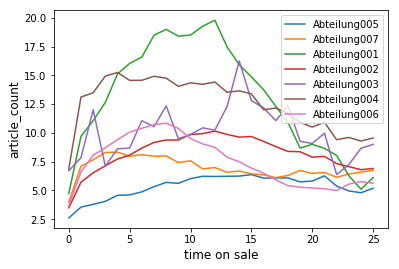

In [7]:
print("Number Characteristics: ", len(df[feat].unique()))
plot_feature_characteristics(df, feat, 'article_count', legend=True);

Number Clusters:  5


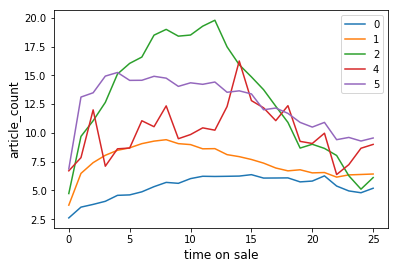

In [8]:
print("Number Clusters: ", len(df_cluster['cluster'].unique()))
plot_feature_characteristics(df_cluster, 'cluster', 'article_count');

### Plot characteristics that are included in a specific Cluster

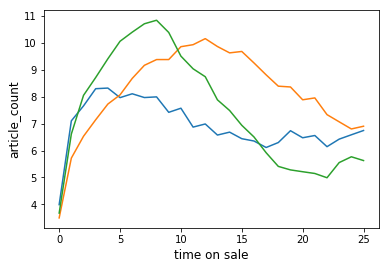

In [9]:
plot_feature_characteristics(df_cluster.loc[df_cluster.cluster == 1], feat, 'article_count', legend=False);

### Plot articles that are included in a Cluster

<module 'matplotlib.pyplot' from '/home/morty/dev/tailor/env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

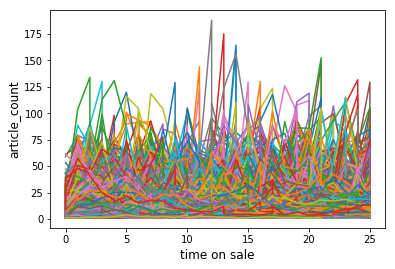

In [10]:
plot_cluster_articles(df, 1, 'article_count', legend=False);

## Todo: 
- Cluster/Characteristics that are not defined for the full time on sale values